In [16]:
import sys
import numpy as np
import matplotlib.pyplot as plt

R = 1; # universal gas constant divided by molecular mass
gamma = 1.4; #ratio of specific heat coefficients
x0 = 0.5 #Film location
M = 81 #number of points


#Dimensionless left and right parameters
rhoR = 1;
pR = 1/gamma;
TR = 1/gamma;
aR = 1;
UR = 0;

rhoL = 8;
pL = 10/gamma;
TL=0;
aL=(gamma*pL/rhoL)**0.5;
UL=0;


In [17]:
#Compatibility equation
def shockTubeFunction(x):
    a = x-1/x
    b = aL*(gamma+1)/(gamma-1)
    c = pR/pL
    d = (2*gamma/(gamma+1))*x**2
    e = (gamma-1)/(gamma+1)
    f = (gamma-1)/(2*gamma)
    
    calculatedValue = b*(1-(c*(d-e))**f) - a
    return calculatedValue

#Using root finding method, bisection method
def bisectionMethodShockTube(lowerBoundGuess,upperBoundGuess,percentErrorTolerance):
    #initialize error
    absoluteError = abs(upperBoundGuess-lowerBoundGuess)/2
    
    #Check to see if root is bracketed from initial guesses
    equationLower = shockTubeFunction(lowerBoundGuess)
    equationUpper = shockTubeFunction(upperBoundGuess)
    if (equationLower*equationUpper) > 0.:
        print("Root has not been bracketed with your guesses. Terminating script...")
        sys.exit()
    
    while absoluteError >= percentErrorTolerance:
        midPoint = (lowerBoundGuess+upperBoundGuess)/2 #bisect upper and lower guesses
        equationLower = shockTubeFunction(lowerBoundGuess)
        equationUpper = shockTubeFunction(upperBoundGuess)
        equationMid = shockTubeFunction(midPoint)
        
        if (equationLower*equationMid) < 0:
            upperBoundGuess = midPoint
        else:
            lowerBoundGuess = midPoint
        
        #bisection method, so cut error in half every iteration
        absoluteError=absoluteError/2
    
    return midPoint
    


In [18]:
def plotShockTube(M,x0,t):
    
    Ms = bisectionMethodShockTube(1,2,0.000001)

    p1 = ((2*gamma/(gamma+1)*Ms**2)-(gamma-1)/(gamma+1))*pR;
    rho1 = (rhoR)/((2/((gamma+1)*Ms**2))+(gamma-1)/(gamma+1));
    U1=(2/(gamma+1))*(Ms-1/Ms);

    U2 = U1
    p2 = p1


    rho2 = rhoL*(p2/pL)**(1/gamma)
    a2 = (gamma*p2/rho2)**0.5
    
    x1 = x0 - aL*t
    x2 = x0 + (U2 - a2)*t
    x3 = x0 +U2*t
    x4 = x0 + Ms*t
    
    xLoc = np.zeros(M+1)
    p = np.zeros(M+1)
    rho = np.zeros(M+1)
    U = np.zeros(M+1)
    
    for i in range(M+1):
        xLoc[i] = i/M
        uExpansion = 2/(gamma+1)*(aL+(xLoc[i]-x0)/t)
        aExpansion = aL - (gamma-1)*uExpansion/2
        pExpansion = pL * (aExpansion/aL)**(2*gamma/(gamma-1))
        rhoExpansion = rhoL*(pExpansion/pL)**(1/gamma)
        if xLoc[i] < x1:
            p[i] = pL
            rho[i] = rhoL
            U[i] = UL
        elif xLoc[i] < x2:
            p[i] = pExpansion
            rho[i] = rhoExpansion
            U[i] = uExpansion
        elif xLoc[i] < x3:
            p[i] = p2
            rho[i] = rho2
            U[i] = U2
        elif xLoc[i] < x4:
            p[i] = p1
            rho[i] = rho1
            U[i] = U1
        else:
            p[i] = pR
            rho[i] = rhoR
            U[i] = UR
        
    plt.plot(xLoc,p)
    plt.title('dimensionless pressure')
    plt.ylabel('p')
    plt.xlabel('x')
    plt.axis([0, max(xLoc), 0, 1.2*max(p)])
    plt.show()
    
    plt.plot(xLoc,rho)
    plt.title('dimensionless density')
    plt.ylabel('rho')
    plt.xlabel('x')
    plt.axis([0, max(xLoc), 0, 1.2*max(rho)])
    plt.show()
    
    plt.plot(xLoc,U)
    plt.ylabel('U')
    plt.title('dimensionless velocity')
    plt.xlabel('x')
    plt.axis([0, max(xLoc), 0, 1.2*max(U)])
    plt.show()

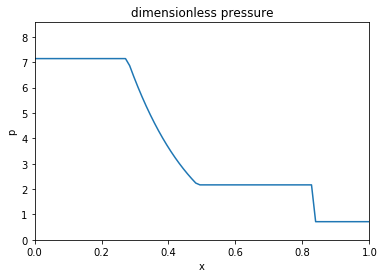

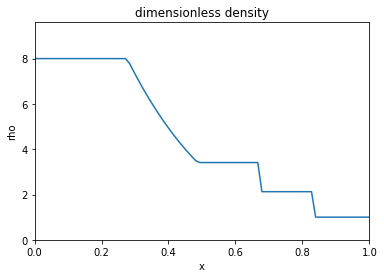

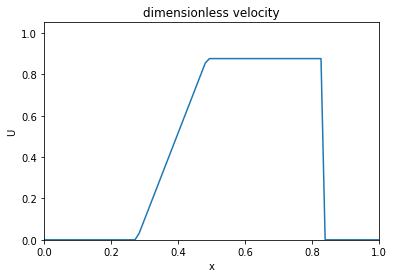

In [19]:
plotShockTube(81,0.5,0.2)